# NLP SENTIMENT CLASSIFICATION PROJECT 

### Apple & Google Product Sentiment  


Author:  
Date: 


## 1. Business Understanding

Organizations such as **Apple, Google, and third-party consumer electronics companies** rely heavily on public opinion expressed on social media platforms like Twitter (X). These organizations face the ongoing challenge of understanding how customers feel about their products in real time. With millions of tweets created every day, it becomes difficult for product teams, customer experience teams, and marketing departments to manually monitor sentiment or identify trends quickly.

### **Stakeholder Analysis**
- **Primary Stakeholder:** Product and Marketing Teams at Apple and Google.
- **Secondary Stakeholders:**
  - Customer experience analysts  
  - Social media managers  
  - Competitor intelligence teams  
  - Consumer behavior researchers  

### **Problem Statement**
Stakeholders need to answer crucial questions such as:
- *“How are users reacting to our new feature or product launch?”*  
- *“Are negative emotions suddenly increasing around a particular product?”*  
- *“Which categories attract the most positive engagement?”*

Manually reviewing thousands of tweets is impractical. Without automation, stakeholders risk:
- Missing early warning signs of dissatisfaction  
- Failing to capitalize on positive sentiment  
- Responding slowly to product or service issues raised by customers  

### **Proposed Solution**
This project develops an **NLP(Natural Language Processing) sentiment classification model** that automatically identifies whether a tweet expresses positive, negative, or neutral sentiment toward Apple or Google products.

This model provides stakeholders with:
- A scalable, automated way to track brand sentiment  
- Faster insights for decision-making  
- Clear patterns in consumer reactions to product updates, launches, and issues  

### **Value Explanation**
The value of the project lies in enabling stakeholders to:
- Detect sentiment shifts early  
- Prioritize product improvements based on user feedback  
- Tailor marketing strategies to public perception  
- Benchmark Apple versus Google in terms of public sentiment  

This reflects a genuine real-world need: technology companies actively use automated sentiment monitoring to understand and respond to the voice of the customer.

### **Future Scope**
The workflow developed here lays the foundation for a more socially impactful project: analyzing tweets for **signs of depression or emotional distress**. Both projects require:
- Robust text preprocessing  
- Feature engineering  
- Classification modeling  
- Interpretability and responsible AI principles  

By addressing a real-world industry problem now, this project builds the technical and analytical skills required for a health-oriented NLP system in the future.


## 2. Environment Setup

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

# General
import warnings
warnings.filterwarnings("ignore")

nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 3. Data Undestanding

### 3.1: Data Overview

The dataset used in this analysis consists of **9,093 tweets** collected for the purpose of analyzing sentiment toward technology brands. It contains three main features:

* **`tweet_text`** – the full content of the tweet.
* **`emotion_in_tweet_is_directed_at`** – the brand or product referenced in the tweet (e.g., Apple, Google).
* **`is_there_an_emotion_directed_at_a_brand_or_product`** – indicates whether the tweet expresses an emotion toward a brand/product.

The dataset is structured for a **multi-class classification problem**, where the target variable is the type of emotion expressed in the tweet. It combines textual content with brand related metadata, enabling the development of NLP models to detect sentiment and emotion.

The data is publicly available and imported using pandas

---


### 3.2: Data Description

#### 3.2.1: Importing the dataset

In [2]:
data = pd.read_csv('https://query.data.world/s/3r3b3chhfpyo7545c4regquyxcmc34?dws=00000',
                encoding='latin1')

In [3]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### 3.2.2: Basic Structure

In [4]:
#data shape
data.shape

(9093, 3)

In [5]:
#data columns
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

#### 3.2.3: Overview of column types and non-null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


#### 3.2.4:Summary statistics Categorical

In [7]:
data.describe(include='O')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


#### 3.2.5: Missing values

In [8]:
data.isna().mean()*100

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

#### 3.2.6: Duplicates

In [9]:
data.duplicated().sum()

22

### 3.3: Data Summary

---
The dataset consists of **9,093 tweets** and includes three main features:

* **`tweet_text`** – the full tweet content
* **`emotion_in_tweet_is_directed_at`** – the brand or product referenced
* **`is_there_an_emotion_directed_at_a_brand_or_product`** – whether the tweet expresses emotion toward a brand/product

---
The data basic structure and quality:

* The **`tweet_text`** column is almost complete, with **9,092 non-null entries** and **9,065 unique tweets**, indicating very high diversity and minimal missing data.
* The **`emotion_in_tweet_is_directed_at`** column shows significant sparsity, with **63.8% missing values**, suggesting that many tweets do not mention a specific brand. Among the populated entries, there are **9 unique categories**, with **iPad** being the most frequently referenced.
* The **emotion-indicator** column is fully complete (**0% missing**) with **4 distinct categories**, where the most common label is **“No emotion toward brand or product”**.

* Only **22 duplicate records** are present, which is less than **0.25%** of the dataset, making it largely clean and ready for further preprocessing.

---

**Overall** This dataset provides a solid foundation for objectives outlined i.e. `Emotion classification, Brand sentiment analysis, NLP-based tweet modeling`
Despite the sparsity in brand-target information, the dataset contains **rich textual content** and **reliable emotion labels** that support exploratory analysis and machine learning applications.


## 4: Data Preparation

### 4.1: Data Cleaning

#### 4.1.1: Making a copy of the data

In [10]:
#copy
df = data.copy()
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### 4.1.2: Removing Duplicates

In [11]:
# Checking the number of rows before deduplication
print(f"Shape Before: {df.shape}")

#rmv duplicates
df = df.drop_duplicates()

#resetting index
df = df.reset_index(drop=True)

# Checking the number of rows after deduplication
print(f"Shape After: {df.shape}")

Shape Before: (9093, 3)
Shape After: (9071, 3)


- Removed: **22 duplicate rows**
- Status: **Dataset is ready for further preprocessing**

#### 4.1.3: Handling missing values and standardizing columns

In [12]:
#checking 'emotion_in_tweet_is_directed_at'
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               945
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: count, dtype: int64

In [13]:
#renaming columns 
df = df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'target_product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment_label'
})

df.head()

,tweet,target_product,sentiment_label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [14]:
#removing the null values on all columns for simplicity
df = df.dropna().reset_index(drop=True)

#cleanup validation
df.isna().sum()

tweet              0
target_product     0
sentiment_label    0
dtype: int64

In [15]:
df['target_product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [16]:
apple_terms = ['apple', 'iphone', 'ipad', 'mac', 'ios']
google_terms = ['google', 'android', 'nexus', 'pixel']

# Convert the product label to lowercase
df['target_product'] = df['target_product'].str.lower()

# Helper function to classify each row
def classify_brand(text):
    if any(term in text for term in apple_terms):
        return 'apple'
    if any(term in text for term in google_terms):
        return 'google'
    return 'other'   # In case something unexpected slips through

# Apply classification
df['company'] = df['target_product'].apply(classify_brand)

df.head()

,tweet,target_product,sentiment_label,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone,Negative emotion,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,ipad or iphone app,Positive emotion,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,ipad,Positive emotion,apple
3,@sxsw I hope this year's festival isn't as cra...,ipad or iphone app,Negative emotion,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,Positive emotion,google


In [17]:
df['company'].unique()

array(['apple', 'google'], dtype=object)

In [18]:
df['sentiment_label'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [19]:
df['sentiment_label'] = df['sentiment_label'].replace({
    'No emotion toward brand or product': 'Neutral'
})

### **Handling Missing Values & Standardizing Columns Summary**

- Reviewed the distribution of product labels to understand category frequency.  
- Standardized column names for clarity (`tweet`, `target_product`, `sentiment_label`).  
- Removed all rows with missing values to ensure a complete dataset.  
- Converted product labels to lowercase for consistency.  
- Mapped each product reference to its parent brand (Apple or Google), creating a new `company` column.  
- Renamed the long sentiment label *"No emotion toward brand or product"* to the standardized category **"Neutral"** for clarity and alignment with sentiment analysis conventions.  
- Final dataset contains only two company categories: **apple** and **google**.


#### 4.1.4: Normalizing text (lowercase, remove URLs, mentions, hashtags)

In [20]:
def clean_text(text):
    text = str(text).lower()                                 # Lowercase
    
    # Correct URL removal
    text = re.sub(r'http\S+|www\S+', '', text)               # Remove URLs
    
    text = re.sub(r'@\w+', '', text)                         # Remove mentions
    text = re.sub(r'#', '', text)                            # Remove #
    text = re.sub(r'[^a-z\s]', ' ', text)                    # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()                 # Remove extra whitespace
    return text

#### 4.1.5: Removing stopwords

In [21]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = clean_text(text)  # your cleaning function
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)
df['processed_text'] = df['tweet'].apply(preprocess_text)

In [22]:
df.head()

,tweet,target_product,sentiment_label,company,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone,Negative emotion,apple,g iphone hrs tweeting rise austin dead need up...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,ipad or iphone app,Positive emotion,apple,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,ipad,Positive emotion,apple,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,ipad or iphone app,Negative emotion,apple,hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,Positive emotion,google,great stuff fri sxsw marissa mayer google tim ...


#### 4.1.6: Lemmatize words 

In [23]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lem_words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(lem_words)
df['processed_text'] = df['processed_text'].apply(lemmatize_text)

In [24]:
df.head()

,tweet,target_product,sentiment_label,company,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone,Negative emotion,apple,g iphone hr tweeting rise austin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,ipad or iphone app,Positive emotion,apple,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,ipad,Positive emotion,apple,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,ipad or iphone app,Negative emotion,apple,hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,Positive emotion,google,great stuff fri sxsw marissa mayer google tim ...


### **Text Normalization & Preprocessing Summary**

- Normalized all tweets by converting text to lowercase and removing URLs, mentions, hashtags, punctuation, and extra whitespace.
- Removed English stopwords to keep only meaningful words that contribute to sentiment.
- Applied lemmatization to reduce words to their base form, improving consistency across the dataset.
- Created a new column, `processed_text`, containing fully cleaned, stopword-free, and lemmatized tweet content prepared for feature extraction and modeling.


## 5: Exploratory Data Analysis (EDA)

### 5.1: Univariate Analysis

#### 5.1.1: Sentiment Distribution

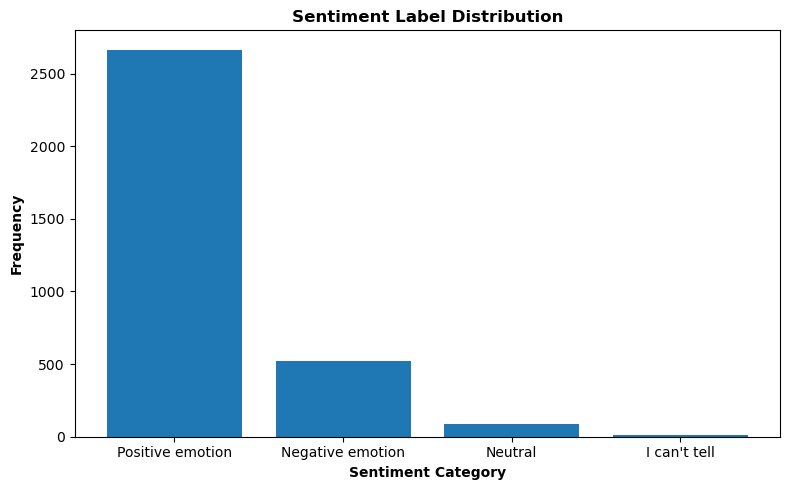

In [25]:
sentiment_counts = df['sentiment_label'].value_counts()

# Plot
plt.figure(figsize=(8,5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Label Distribution", fontweight='bold')
plt.xlabel("Sentiment Category", fontweight='bold')
plt.ylabel("Frequency",fontweight='bold')
plt.tight_layout()
plt.show()

The chart shows that **Positive emotion** is the most common sentiment in the dataset, followed by **Negative emotion**. The **Neutral** category appears much less frequently, and **I can't tell** is the least represented. This indicates an imbalanced distribution, with most tweets expressing positive reactions toward the products or brands.


#### 5.1.2: Target Product Distribution

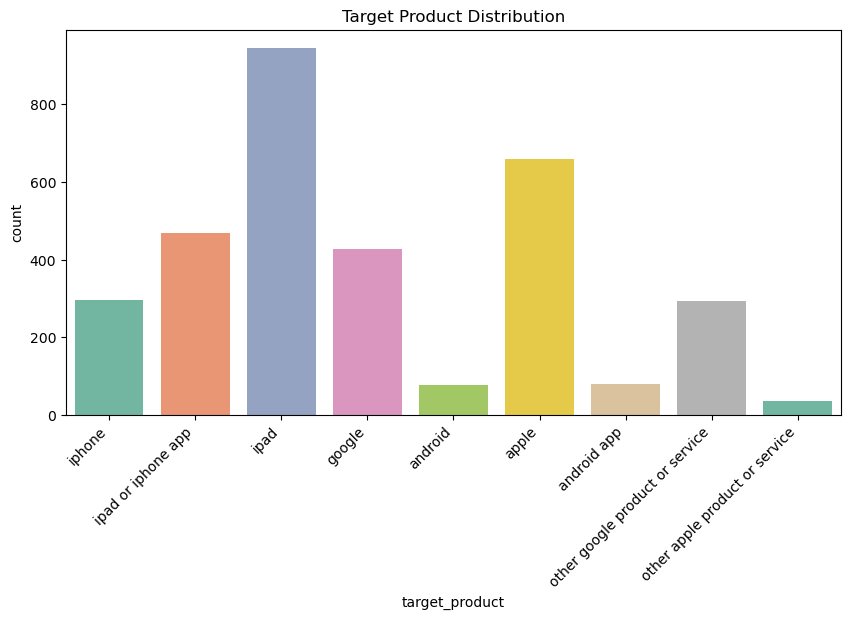

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='target_product', palette="Set2")
plt.title("Target Product Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()


The chart shows that **iPad** is the most frequently mentioned product in the dataset, followed by **Apple**, **iPad or iPhone App**, and **Google**. Mentions of **Android**, **Android App**, and other Apple/Google services appear significantly less often. This indicates that user discussions are heavily centered around Apple’s core products, with fewer tweets referencing Android-related items or secondary services.


#### 5.1.3: Distribution of tweet lengths

In [27]:
df['text_len'] = df['processed_text'].apply(lambda x: len(x.split()))

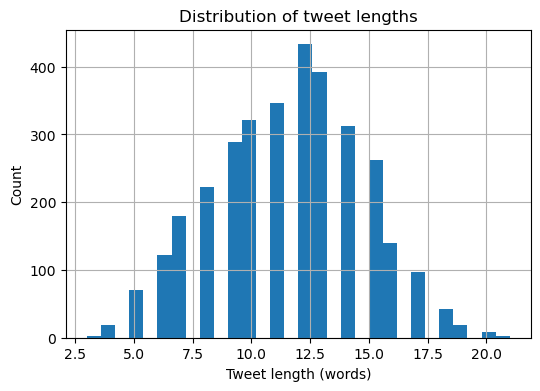

In [28]:
#plotting the distribution of tweet lengths
plt.figure(figsize=(6,4))
df["text_len"].hist(bins=30)
plt.xlabel("Tweet length (words)")
plt.ylabel("Count")
plt.title("Distribution of tweet lengths")
plt.show()

The histogram shows that most tweets in the dataset contain between **10 and 15 words**, indicating that users typically write short, concise messages when expressing opinions about tech products. Very short or very long tweets are less common, and the overall distribution appears roughly normal, centered around medium-length tweets.


#### 5.1.4: Distribution of Company

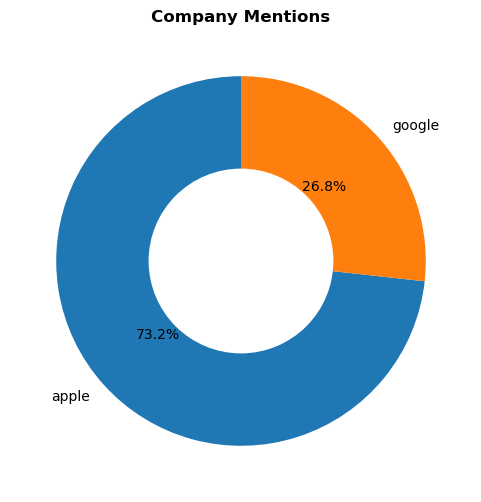

In [29]:
company_counts = df['company'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Company Mentions", fontweight='bold')
plt.show()


The donut chart shows that **Apple** is mentioned far more frequently than **Google** in the dataset. Apple accounts for about **73%** of all tweets, while Google represents only **27%**. This indicates that user discussions are heavily Apple-focused, with significantly fewer tweets referencing Google products or services.


### 5.2: Bivariate Analysis

#### 5.2.1: Tweet Lengths by Sentiment Comparison

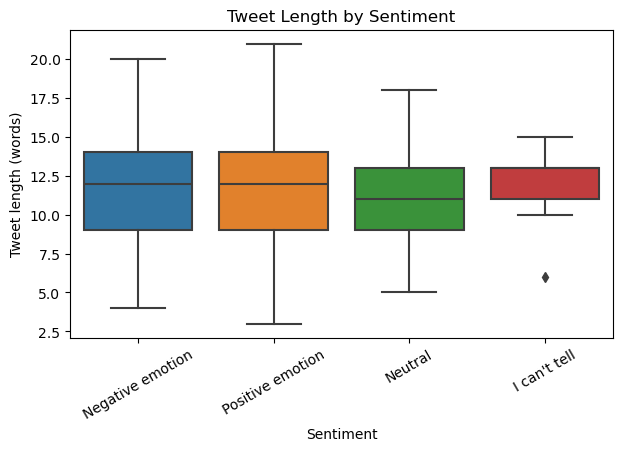

In [30]:
#plotting the distribution of tweet lengths by sentiment
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="sentiment_label", y="text_len")
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet length (words)")
plt.xticks(rotation=30)
plt.show()

The boxplot shows that tweet lengths are **fairly similar** across all sentiment categories. **Positive** and **negative** tweets have comparable **median lengths**, while **neutral** tweets tend to be **slightly** **shorter on average**. The **“I can't tell”** category shows the **least variation**, indicating more consistency in tweet length. Overall, sentiment does not appear to drastically influence how long users’ messages are.

#### 5.2.2: Sentiment Counts by Company

<Figure size 1000x800 with 0 Axes>

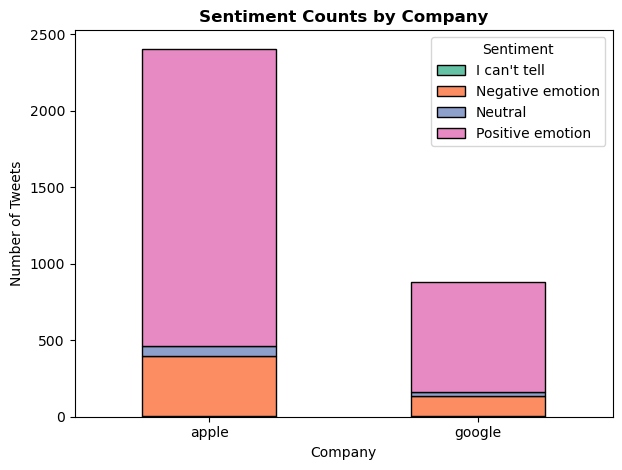

In [31]:
# Data Prep
sent_by_company = df.groupby(["company", "sentiment_label"]).size().unstack(fill_value=0)
colors = sns.color_palette("Set2", n_colors=len(sent_by_company.columns))

# Plotting
plt.figure(figsize=(10,8))
sent_by_company.plot(kind="bar", stacked=True, color=colors, edgecolor="black")

plt.title("Sentiment Counts by Company", fontweight='bold')
plt.xlabel("Company")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.legend(title="Sentiment", bbox_to_anchor=(.65, 1), loc="upper left")
plt.tight_layout()
plt.show();


Building on the earlier sentiment distribution analysis which showed that **positive emotion** is the most dominant sentiment overall, this stacked bar chart further reveals how these sentiments are distributed between the two companies. Apple receives a much larger volume of tweets than Google, and this higher activity includes a substantial number of positive messages, reinforcing the earlier observation that users tend to express favorable opinions more frequently.

Negative and neutral sentiments remain comparatively lower for both companies, consistent with the general sentiment imbalance identified earlier. The “I can't tell” category is minimal across the board, indicating that most tweets express a clear emotional tone. Overall, this visualization confirms that not only are users more inclined to discuss Apple, but these discussions are also aligned with the broader trend of predominantly positive sentiment found in the dataset.


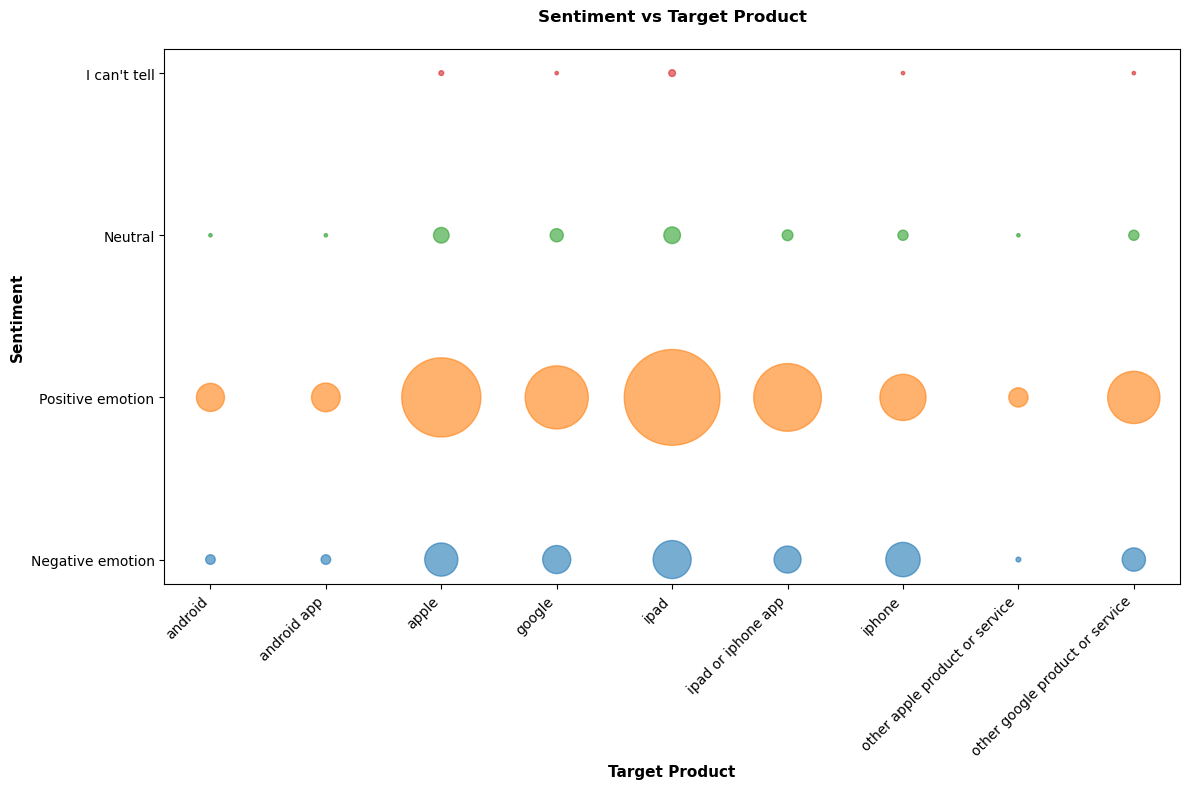

In [32]:
# Creating pivot table
sent_prod = df.groupby(["target_product", "sentiment_label"]).size().unstack(fill_value=0)

ordered_cols = ["Negative emotion", "Positive emotion", "Neutral", "I can't tell"]
sent_prod = sent_prod[ordered_cols]

sent_prod_reset = sent_prod.reset_index()

fig, ax = plt.subplots(figsize=(12,8))

for sentiment in ordered_cols:
    ax.scatter(
        sent_prod_reset["target_product"],
        [sentiment] * len(sent_prod_reset),
        s=sent_prod_reset[sentiment] * 6, 
        alpha=0.6,
        label=sentiment
    )
ax.set_title("Sentiment vs Target Product", fontsize=12, fontweight='bold', pad=20)
ax.set_xlabel("Target Product",fontsize=11, fontweight='bold')
ax.set_ylabel("Sentiment",fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


The bubble chart provides a visual comparison of how different sentiments are distributed across product categories. Larger bubbles represent a higher number of tweets. Positive sentiment dominates across nearly all products, especially for **iPad**, **iPhone**, and **Apple** categories, where large bubbles indicate strong positive engagement. Negative sentiment bubbles appear moderately across several products but remain noticeably smaller, while neutral and "I can't tell" sentiments show minimal activity. This visualization highlights that most user discussions across product types tend to express positive emotions, with relatively few negative or unclear sentiments.


### 5.3: NLP Specific Visuals

#### 5.3.1: Top Words Across Sentiments

In [33]:
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer()
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
pos_corpus = df[df["sentiment_label"] == "Positive emotion"]["processed_text"].astype(str).tolist()
neg_corpus = df[df["sentiment_label"] == "Negative emotion"]["processed_text"].astype(str).tolist()

top_pos = get_top_n_words(pos_corpus, n=20)
top_neg = get_top_n_words(neg_corpus, n=20)

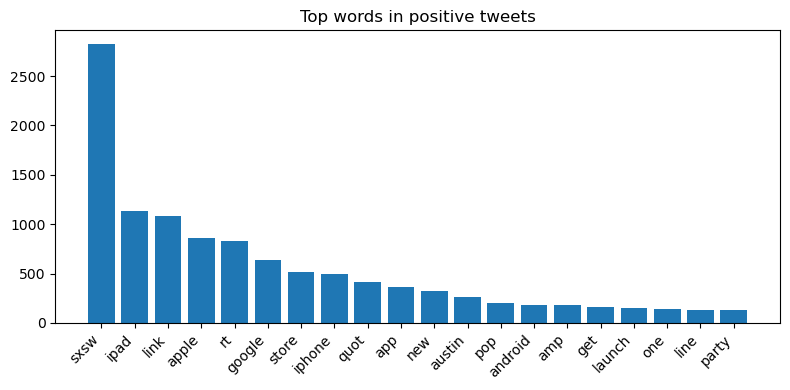

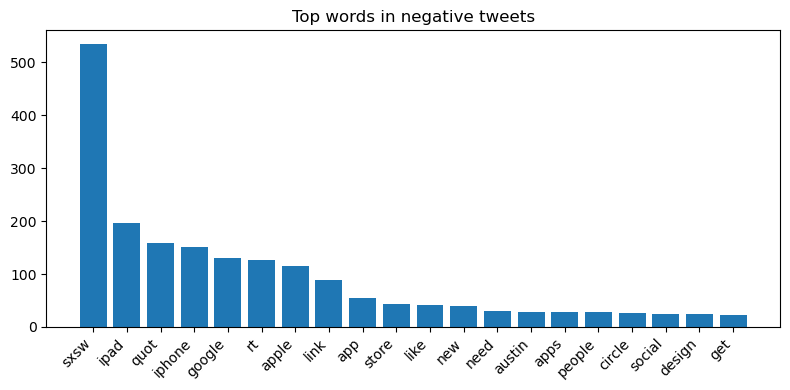

In [35]:
def plot_top_words(word_freq, title):
    words, freqs = zip(*word_freq)
    plt.figure(figsize=(8,4))
    plt.bar(range(len(words)), freqs)
    plt.xticks(range(len(words)), words, rotation=45, ha="right")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_top_words(top_pos, "Top words in positive tweets")
plot_top_words(top_neg, "Top words in negative tweets")


The charts compare the most frequently used words in positive and negative tweets. Positive tweets prominently feature terms like **sxsw**, **ipad**, **link**, and **apple**, suggesting excitement around events, products, and updates. Negative tweets also include some of the same product related words, such as **ipad**, **iphone**, and **store**, but often in different contexts. Overall, positive tweets contain a broader variety of high-frequency terms, while negative tweets show fewer but more concentrated word patterns.


#### 5.3.2: Top Bigrams

In [36]:
def get_top_n_ngrams(corpus, n=20, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_pos_bi = get_top_n_ngrams(pos_corpus, n=20, ngram_range=(2,2))
top_neg_bi = get_top_n_ngrams(neg_corpus, n=20, ngram_range=(2,2))

df_pos_bigrams = pd.DataFrame(top_pos_bi, columns=["bigram", "frequency"])
df_neg_bigrams = pd.DataFrame(top_neg_bi, columns=["bigram", "frequency"])

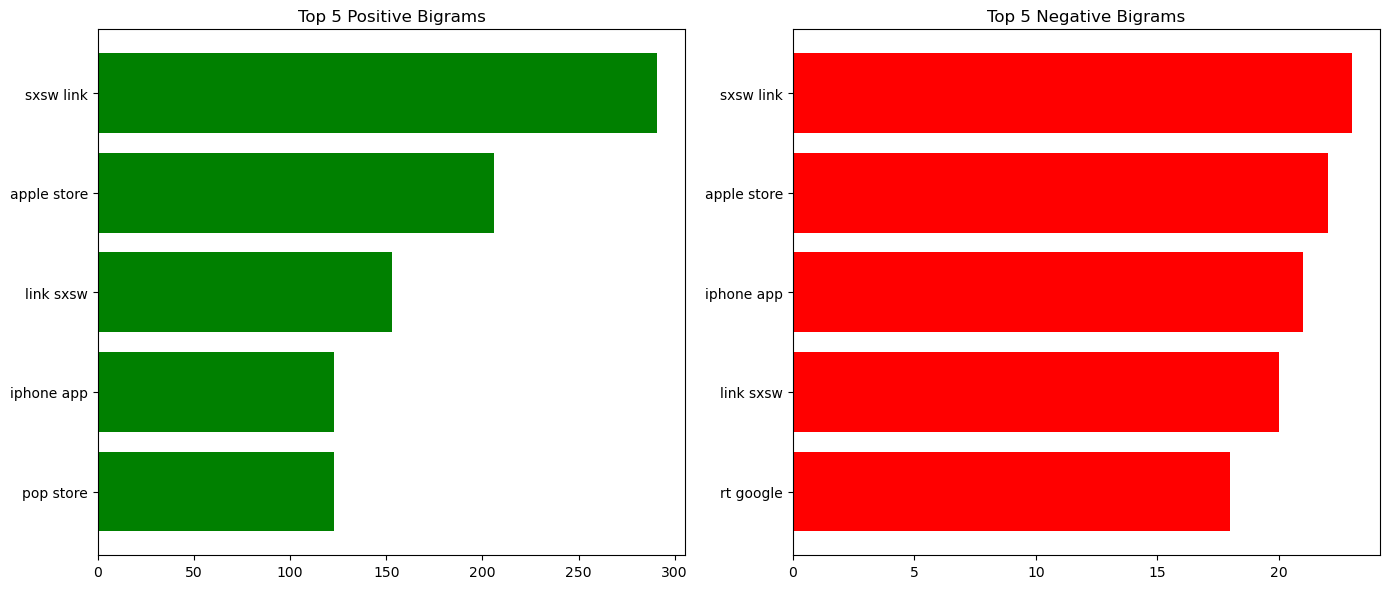

In [37]:
#Visualization
pos5 = df_pos_bigrams.head()
neg5 = df_neg_bigrams.head()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].barh(pos5['bigram'], pos5['frequency'], color='green')
axes[0].set_title("Top 5 Positive Bigrams")
axes[0].invert_yaxis()

axes[1].barh(neg5['bigram'], neg5['frequency'], color='red')
axes[1].set_title("Top 5 Negative Bigrams")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

The most frequent bigrams in positive tweets highlight product-related excitement and event-driven discussions. The top examples are as shown above.
These bigrams suggest strong engagement around SXSW events, Apple product releases, and app-related interactions.
On the other hand, Negative tweets show fewer repeated patterns, but still reflect concerns or issues linked to similar products and services. The top examples are as shown above. These patterns indicate that negative sentiment often revolves around the same tech ecosystems but appears far. The visualization is as below.

#### 5.3.3: Word Cloud

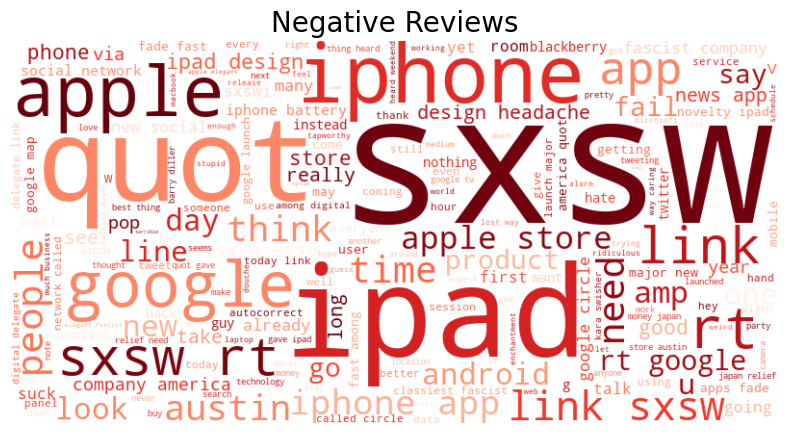

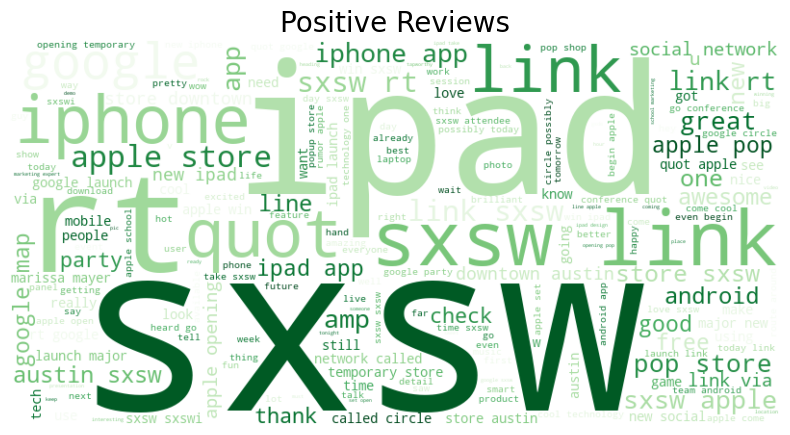

In [38]:
# Separate the texts based on their labels
negative_texts = ' '.join(df[df['sentiment_label'] == 'Negative emotion']['processed_text'])
positive_texts = ' '.join(df[df['sentiment_label'] == 'Positive emotion']['processed_text'])

# Function to generate and plot word cloud
def plot_wordcloud(text, color, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Plot word clouds
plot_wordcloud(negative_texts, 'Reds', 'Negative Reviews')
plot_wordcloud(positive_texts, 'Greens', 'Positive Reviews')


The word clouds illustrate the most frequently occurring terms in positive and negative tweets.  
In **negative reviews**, words such as *ipad*, *iphone*, *apple*, and *sxsw* appear prominently, often associated with issues, complaints, or user frustration.  
In contrast, **positive reviews** feature similar product related terms, but within a more favorable context, with words like *awesome*, *cool*, *link*, and *great* appearing more often.

Both word clouds highlight that discussions around **Apple products** and the **SXSW** event dominate user conversations, but the tone and surrounding context differ significantly between positive and negative sentiments.

In [39]:
keywords = ["battery", "crash", "lag", "slow", "overheat", "bug", "update"]

for kw in keywords:
    total = df["processed_text"].str.contains(kw, case=False, na=False).sum()
    neg = df[(df["sentiment_label"]=="Negative emotion") & (df["processed_text"].str.contains(kw, case=False, na=False))].shape[0]
    print(f"{kw}: total={total}, negative={neg}")

battery: total=34, negative=20
crash: total=15, negative=11
lag: total=2, negative=1
slow: total=8, negative=1
overheat: total=1, negative=1
bug: total=5, negative=3
update: total=43, negative=4


## 6: Feature Engineering

### 6.1: TF-IDF vectors

Feature engineering is critical for transforming raw text data into meaningful numerical representations that machine learning models can understand. In this section, we create multiple types of features:

1. **TF-IDF Vectors**: Capture word importance across the corpus
2. **Numeric Features**: Text statistics and sentiment indicators
3. **Advanced Features**: N-grams, special characters, and linguistic patterns
4. **Target Encoding**: Convert sentiment labels to numerical format

These engineered features will be used to train and evaluate our sentiment classification models.

In [40]:
# Initialize TF-IDF Vectorizer
# max_features limits vocabulary size, ngram_range includes unigrams and bigrams
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.95)

# Fit and transform the processed text
X_tfidf = tfidf.fit_transform(df['processed_text'])

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")
print(f"\nSample features (first 20):")
print(tfidf.get_feature_names_out()[:20])

TF-IDF matrix shape: (3282, 5000)
Vocabulary size: 5000

Sample features (first 20):
['aapl' 'able' 'absolutely' 'abt' 'access' 'accessible' 'accessory' 'aclu'
 'aclu google' 'aclu party' 'acquired' 'across' 'action' 'action link'
 'actsofsharing' 'actsofsharing com' 'actual' 'actually' 'ad' 'add']


### 6.2: Additional numeric features 

In [41]:
# Create additional numeric features that can improve model performance

# 1. Text length features
df['char_count'] = df['processed_text'].apply(len)
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['processed_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)

# 2. Special character counts
df['exclamation_count'] = df['tweet'].apply(lambda x: x.count('!'))
df['question_count'] = df['tweet'].apply(lambda x: x.count('?'))
df['uppercase_count'] = df['tweet'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['hashtag_count'] = df['tweet'].apply(lambda x: x.count('#'))
df['mention_count'] = df['tweet'].apply(lambda x: x.count('@'))

# 3. Sentiment-related features
df['positive_word_count'] = df['processed_text'].apply(lambda x: sum(1 for word in x.split() if word in ['good', 'great', 'excellent', 'amazing', 'love', 'best', 'awesome', 'fantastic', 'perfect', 'wonderful']))
df['negative_word_count'] = df['processed_text'].apply(lambda x: sum(1 for word in x.split() if word in ['bad', 'terrible', 'horrible', 'worst', 'hate', 'awful', 'poor', 'disappointing', 'useless', 'broken']))

# 4. Company encoding (binary features)
df['is_apple'] = (df['company'] == 'apple').astype(int)
df['is_google'] = (df['company'] == 'google').astype(int)

# Display the new features
print("New numeric features created:")
print(df[['char_count', 'word_count', 'avg_word_length', 'exclamation_count', 
          'question_count', 'positive_word_count', 'negative_word_count', 
          'is_apple', 'is_google']].head(10))

print("\n" + "="*50)
print("Feature Statistics:")
print(df[['char_count', 'word_count', 'avg_word_length', 'exclamation_count', 
          'question_count', 'positive_word_count', 'negative_word_count']].describe())

New numeric features created:
   char_count  word_count  avg_word_length  exclamation_count  question_count  \
0          70          12         4.916667                  1               0   
1          77          13         5.000000                  0               1   
2          24           5         4.000000                  0               0   
3          46           8         4.875000                  0               0   
4         102          16         5.437500                  0               0   
5          77          13         5.000000                  0               0   
6          63          10         5.400000                  1               0   
7          67          11         5.181818                  0               0   
8          63          10         5.400000                  0               0   
9          61          11         4.636364                  0               0   

   positive_word_count  negative_word_count  is_apple  is_google  
0          

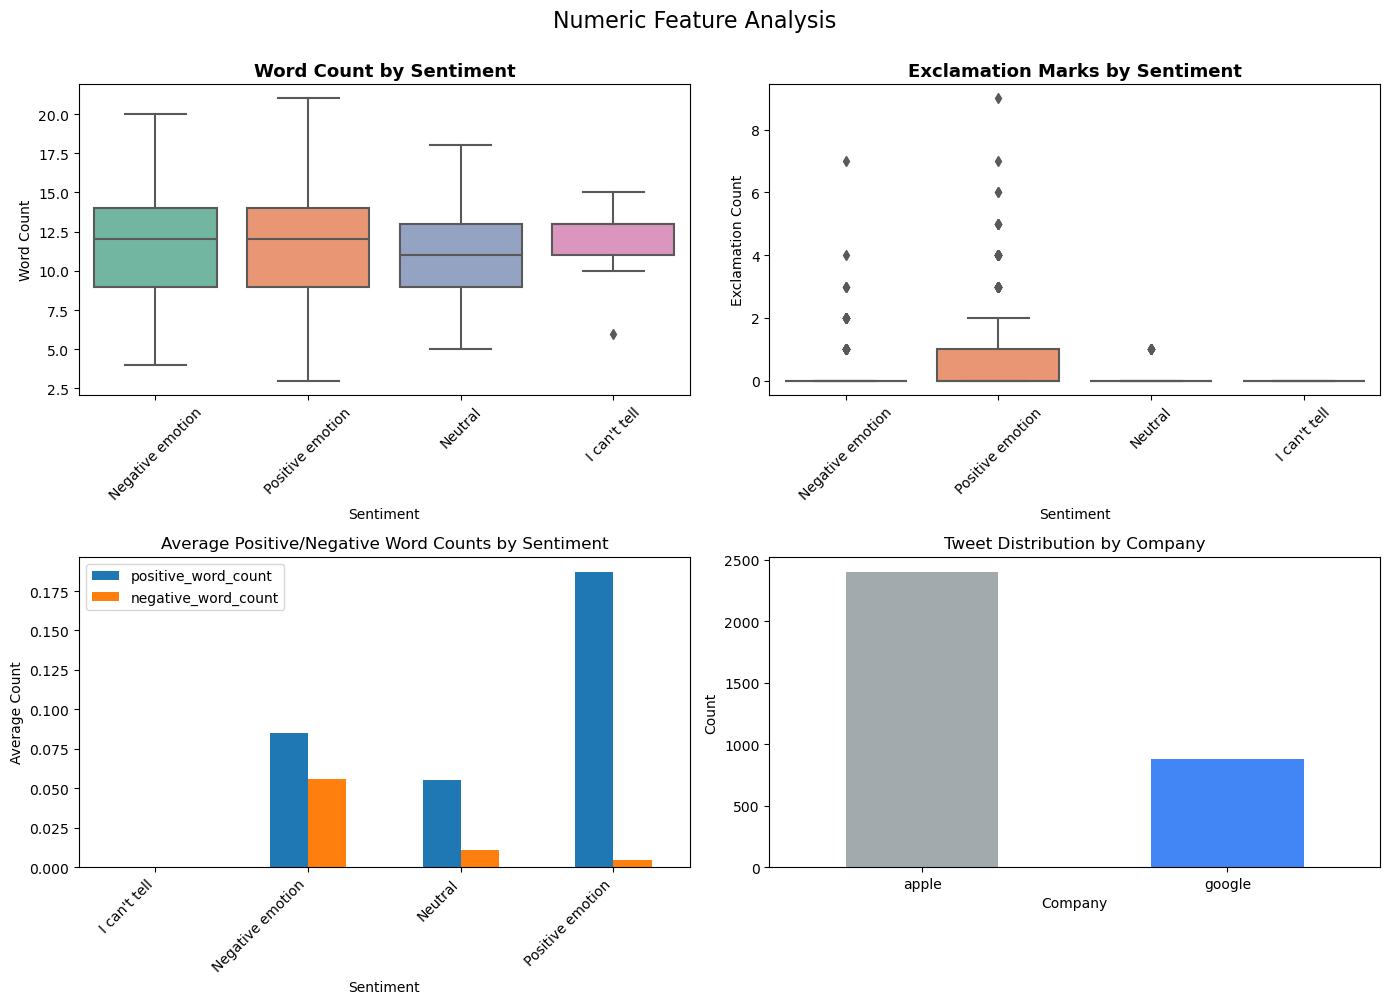

In [42]:
# Visualize some of the numeric features

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Word count distribution by sentiment
sns.boxplot(data=df,x="sentiment_label",y="word_count",palette="Set2",ax=axes[0,0])
axes[0,0].set_title("Word Count by Sentiment", fontsize=13, fontweight='bold')
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Word Count")
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Exclamation marks by sentiment
sns.boxplot(data=df,x="sentiment_label",y="exclamation_count",palette="Set2",ax=axes[0,1])
axes[0,1].set_title("Exclamation Marks by Sentiment", fontsize=13, fontweight='bold')
axes[0,1].set_xlabel("Sentiment")
axes[0,1].set_ylabel("Exclamation Count")
axes[0,1].tick_params(axis='x', rotation=45)


# 3. Positive word count by sentiment
sentiment_counts = df.groupby('sentiment_label')[['positive_word_count', 'negative_word_count']].mean()
sentiment_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Positive/Negative Word Counts by Sentiment')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Average Count')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# 4. Company distribution
df['company'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['#A2AAAD', '#4285F4'])
axes[1, 1].set_title('Tweet Distribution by Company')
axes[1, 1].set_xlabel('Company')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.suptitle('Numeric Feature Analysis', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

### 6.3: Encoded target labels

In [45]:
df['sentiment_label'].value_counts()

sentiment_label
Positive emotion    2664
Negative emotion     518
Neutral               91
I can't tell           9
Name: count, dtype: int64

Because the *"I can't tell"* category has only 9 samples, it is too small for reliable model training. Such a tiny class causes problems during cross-validation, prevents oversampling methods from working, and leads to unstable or undefined performance metrics. 

To avoid these issues and improve overall model stability, we merge *"I can't tell"* into the **Neutral** class. This simplifies the sentiment structure and ensures that ambiguous or unclear expressions are handled consistently.

In [46]:
# Merge the very small "I can't tell" class into Neutral
df['sentiment_label'] = df['sentiment_label'].replace({
    "I can't tell": "Neutral"
})

# Check updated distribution
print(df['sentiment_label'].value_counts())

sentiment_label
Positive emotion    2664
Negative emotion     518
Neutral              100
Name: count, dtype: int64


In [47]:
# Encode sentiment labels for machine learning models
# Convert categorical sentiment labels to numeric values

# Display unique sentiment labels
print("Unique sentiment labels:")
print(df['sentiment_label'].unique())
print("\nLabel distribution:")
print(df['sentiment_label'].value_counts())

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the sentiment labels
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_label'])

# Create mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\n" + "="*50)
print("Label Encoding Mapping:")
for label, code in label_mapping.items():
    print(f"  {label} -> {code}")

# Display examples
print("\n" + "="*50)
print("Sample of encoded labels:")
print(df[['sentiment_label', 'sentiment_encoded']].head(10))

Unique sentiment labels:
['Negative emotion' 'Positive emotion' 'Neutral']

Label distribution:
sentiment_label
Positive emotion    2664
Negative emotion     518
Neutral              100
Name: count, dtype: int64

Label Encoding Mapping:
  Negative emotion -> 0
  Neutral -> 1
  Positive emotion -> 2

Sample of encoded labels:
    sentiment_label  sentiment_encoded
0  Negative emotion                  0
1  Positive emotion                  2
2  Positive emotion                  2
3  Negative emotion                  0
4  Positive emotion                  2
5  Positive emotion                  2
6  Positive emotion                  2
7  Positive emotion                  2
8  Positive emotion                  2
9  Positive emotion                  2


### 6.4: Advanced Text Features

Beyond basic TF-IDF and simple counts, we can extract more sophisticated linguistic features that capture nuances in the text.

In [48]:
# Advanced linguistic features

# 1. Punctuation density
df['punctuation_count'] = df['tweet'].apply(lambda x: sum(1 for c in x if c in '!?.,;:'))
df['punctuation_density'] = df['punctuation_count'] / (df['char_count'] + 1)

# 2. Capital letter ratio (intensity indicator)
df['capital_ratio'] = df['uppercase_count'] / (df['char_count'] + 1)

# 3. Unique word ratio (vocabulary diversity)
df['unique_word_ratio'] = df['processed_text'].apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))

# 4. Repeated character patterns (e.g., "soooo" or "!!!")
df['repeated_chars'] = df['tweet'].apply(lambda x: len(re.findall(r'(.)\1{2,}', x)))

# 5. URL presence (already removed but check original)
df['has_url'] = df['tweet'].apply(lambda x: 1 if 'http' in x.lower() or 'www' in x.lower() else 0)

# 6. Ellipsis count (indicates trailing thought)
df['ellipsis_count'] = df['tweet'].apply(lambda x: x.count('...'))

# 7. Average sentence length (approximated by splitting on periods)
df['sentence_count'] = df['tweet'].apply(lambda x: len([s for s in x.split('.') if s.strip()]))
df['avg_sentence_length'] = df['word_count'] / (df['sentence_count'] + 1)

print("Advanced text features created successfully!")
print("\nSample of advanced features:")
print(df[['punctuation_density', 'capital_ratio', 'unique_word_ratio', 
          'repeated_chars', 'has_url', 'ellipsis_count']].head(10))

print("\n" + "="*50)
print("Advanced Feature Statistics:")
print(df[['punctuation_density', 'capital_ratio', 'unique_word_ratio', 
          'repeated_chars', 'ellipsis_count', 'avg_sentence_length']].describe())

Advanced text features created successfully!

Sample of advanced features:
   punctuation_density  capital_ratio  unique_word_ratio  repeated_chars  \
0             0.084507       0.211268           0.923077               0   
1             0.038462       0.128205           0.928571               0   
2             0.080000       0.280000           0.833333               0   
3             0.021277       0.042553           0.777778               0   
4             0.029126       0.135922           0.941176               0   
5             0.025641       0.102564           0.928571               0   
6             0.046875       0.109375           0.909091               0   
7             0.000000       0.044118           0.916667               0   
8             0.031250       0.093750           0.909091               1   
9             0.064516       0.258065           0.916667               0   

   has_url  ellipsis_count  
0        0               0  
1        0               0  
2

### 6.5: Combining Features for Model Training

Now we'll combine TF-IDF features with our numeric features to create comprehensive feature sets for different modeling approaches.

In [49]:
# Prepare feature sets for modeling

# 1. Select numeric features to include
numeric_features = [
    'char_count', 'word_count', 'avg_word_length',
    'exclamation_count', 'question_count', 'uppercase_count',
    'hashtag_count', 'mention_count',
    'positive_word_count', 'negative_word_count',
    'is_apple', 'is_google',
    'punctuation_density', 'capital_ratio', 'unique_word_ratio',
    'repeated_chars', 'has_url', 'ellipsis_count', 'avg_sentence_length'
]

# 2. Extract numeric feature matrix
X_numeric = df[numeric_features].values

# 3. Standardize numeric features for better model performance
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# 4. Convert TF-IDF sparse matrix to dense (for combining)
X_tfidf_dense = X_tfidf.toarray()

# 5. Combine TF-IDF and numeric features
X_combined = np.hstack([X_tfidf_dense, X_numeric_scaled])

# 6. Extract target variable
y = df['sentiment_encoded'].values

print("Feature Engineering Summary:")
print("="*60)
print(f"TF-IDF features shape: {X_tfidf.shape}")
print(f"Numeric features shape: {X_numeric.shape}")
print(f"Combined features shape: {X_combined.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nNumber of classes: {len(np.unique(y))}")
print(f"Class distribution:")
for label, code in label_mapping.items():
    count = np.sum(y == code)
    percentage = (count / len(y)) * 100
    print(f"  {label} (encoded as {code}): {count} samples ({percentage:.2f}%)")

print("\n" + "="*60)
print("Ready for model training!")

Feature Engineering Summary:
TF-IDF features shape: (3282, 5000)
Numeric features shape: (3282, 19)
Combined features shape: (3282, 5019)
Target variable shape: (3282,)

Number of classes: 3
Class distribution:
  Negative emotion (encoded as 0): 518 samples (15.78%)
  Neutral (encoded as 1): 100 samples (3.05%)
  Positive emotion (encoded as 2): 2664 samples (81.17%)

Ready for model training!


In [50]:
# Split data into training and testing sets
# Use stratified split to maintain class distribution

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Train-Test Split Summary:")
print("="*60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

print("\nClass distribution in training set:")
for label, code in label_mapping.items():
    count = np.sum(y_train == code)
    percentage = (count / len(y_train)) * 100
    print(f"  {label}: {count} samples ({percentage:.2f}%)")

print("\nClass distribution in test set:")
for label, code in label_mapping.items():
    count = np.sum(y_test == code)
    percentage = (count / len(y_test)) * 100
    print(f"  {label}: {count} samples ({percentage:.2f}%)")

Train-Test Split Summary:
Training set size: 2625 samples
Testing set size: 657 samples
Feature dimensions: 5019

Class distribution in training set:
  Negative emotion: 414 samples (15.77%)
  Neutral: 80 samples (3.05%)
  Positive emotion: 2131 samples (81.18%)

Class distribution in test set:
  Negative emotion: 104 samples (15.83%)
  Neutral: 20 samples (3.04%)
  Positive emotion: 533 samples (81.13%)


## 7: Baseline Models

### 7.1: Logistic Regression

### 7.2: Multinomial Naive Bayes

### 7.3: Random Forest

### 7.4: Support Vector Machine (SVM)

#### 7.4.1: Simple Model

In [51]:
#initializing and fitting a simple Model
svm_clf = LinearSVC(
    C=1.0,
    random_state=42
)

svm_clf.fit(X_train, y_train)

#predictions
y_pred_svm = svm_clf.predict(X_test)

In [52]:
#Evaluation
acc = accuracy_score(y_test, y_pred_svm)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred_svm,
    average='weighted',
    zero_division=0
)

print("\n" + "="*60)
print("LINEAR SVM PERFORMANCE")
print("="*60)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


LINEAR SVM PERFORMANCE
Accuracy : 0.8645
Precision: 0.8414
Recall   : 0.8645
F1-score : 0.8428

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.76      0.45      0.57       104
         Neutral       0.25      0.05      0.08        20
Positive emotion       0.88      0.98      0.93       533

        accuracy                           0.86       657
       macro avg       0.63      0.49      0.52       657
    weighted avg       0.84      0.86      0.84       657



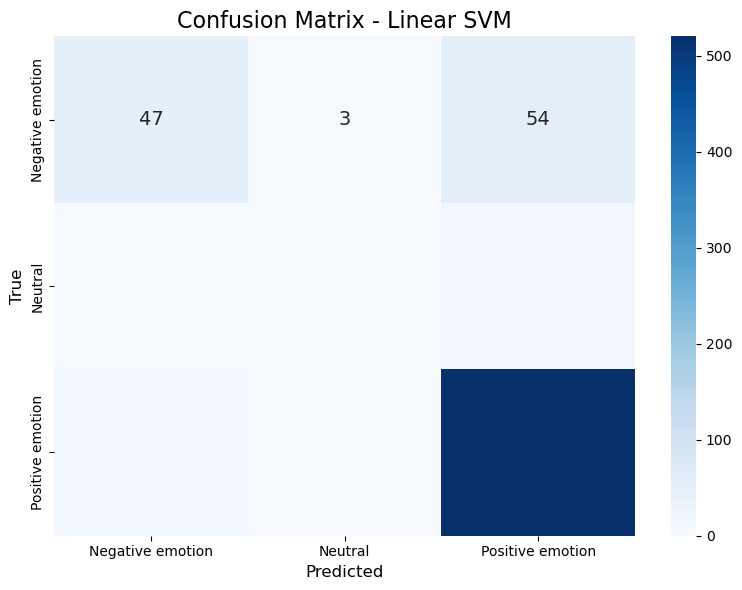

In [55]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,          
    fmt='g',             
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    annot_kws={"size": 14}  
)

plt.title("Confusion Matrix - Linear SVM", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.tight_layout()
plt.show()

#### Summary

The Linear SVM model achieved a strong overall **accuracy of 86.45%**, with a **weighted precision of 84.14%**, **weighted recall of 86.45%**, and a **weighted F1-score of 84.28%**. The classifier performs very well on the dominant **Positive emotion** class (precision 0.88, recall 0.98, F1-score 0.93), reflecting the significant class imbalance in the dataset.

However, performance declines notably on the minority classes. **Negative emotion** achieves moderate results (precision 0.76, recall 0.45, F1-score 0.57), while the **Neutral** class performs poorly (precision 0.25, recall 0.05, F1-score 0.08), indicating that the model struggles to correctly identify non-positive sentiments. This is further emphasized by the **macro-averaged F1-score of 0.52**, which highlights uneven performance across classes despite strong overall accuracy.

These results reinforce the need for further refinement—such as class weighting, resampling techniques, or alternative model configurations—to improve the classifier’s ability to detect minority sentiment categories more reliably.


#### 7.4.2: Grid Search with Oversampling the Minority Classes

In [56]:
#Creating Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', LinearSVC(random_state=42))
])

In [57]:
#Hyperparameter Grid
param_grid = {
    'svm__C': [0.01, 0.1, 1, 5, 10],
    'svm__class_weight': [None, 'balanced']
}

In [58]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('svm', LinearSVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.1, 1, 5, 10],
                         'svm__class_weight': [None, 'balanced']},
             scoring='f1_weighted', verbose=2)

In [59]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'svm__C': 1, 'svm__class_weight': None}
Best Score: 0.8127238420932754


#### Hyperparameter Tuning Summary
Grid search was used to identify the optimal hyperparameters for the Linear SVM model. The best-performing configuration was obtained with **C = 1** and **class_weight = None**, achieving a cross-validated **F1-weighted score of 0.8127**. This indicates that increasing model regularization beyond the default (C > 1) or applying class balancing did not improve performance on the validation folds. The selected parameters align well with the observed dataset characteristics, suggesting that the model benefits from a moderate margin and performs adequately despite class imbalance, although minority-class performance still requires further refinement.


#### 7.4.3: Baseline Model on TF_IDF Features

In [60]:
#splitting the data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [66]:
svm_tfidf = LinearSVC(random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
precision_tfidf, recall_tfidf, f1_tfidf, _ = precision_recall_fscore_support(
    y_test_tfidf, y_pred_tfidf,
    average='weighted',
    zero_division=0
)

print("\n" + "="*60)
print("LINEAR SVM ON TF_IDF PERFORMANCE")
print("="*60)
print(f"Accuracy : {acc_tfidf:.4f}")
print(f"Precision: {precision_tfidf:.4f}")
print(f"Recall   : {recall_tfidf:.4f}")
print(f"F1-score : {f1_tfidf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=label_encoder.classes_))


LINEAR SVM ON TF_IDF PERFORMANCE
Accuracy : 0.8615
Precision: 0.8374
Recall   : 0.8615
F1-score : 0.8393

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.75      0.43      0.55       104
         Neutral       0.20      0.05      0.08        20
Positive emotion       0.88      0.98      0.92       533

        accuracy                           0.86       657
       macro avg       0.61      0.49      0.52       657
    weighted avg       0.84      0.86      0.84       657



#### 7.4.4: Grid Search for the best TF-IDF SVM

In [64]:
param_grid_tf = {
    'C': [0.01, 0.1, 1, 5, 10],
    'class_weight': [None, 'balanced']
}
svm_tfidf_model = LinearSVC(random_state=42)

grid_tfidf = GridSearchCV(
    svm_tfidf_model,
    param_grid_tf,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_tfidf.fit(X_train_tfidf, y_train_tfidf)

print("Best Params:", grid_tfidf.best_params_)
print("Best F1 Score:", grid_tfidf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params: {'C': 1, 'class_weight': None}
Best F1 Score: 0.8159627115040571


### Comparison of Linear SVM Models
Two SVM models were tested: one using **TF-IDF only**, and one using **Combined_data**.  
Both models performed almost the same.

#### **Overall Performance**
| Metric | TF-IDF Only | Combined Features |
|--------|-------------|-------------------|
| **Accuracy** | 0.8615 | 0.8645 |
| **Precision** | 0.8374 | 0.8414 |
| **Recall** | 0.8615 | 0.8645 |
| **F1-score** | 0.8393 | 0.8428 |

The combined model is only slightly better, with differences too small to matter.

#### **Class Performance**
- Both models are excellent at predicting **Positive emotion**.
- Both struggle with **Neutral** (very few samples).
- The combined model improves **Negative emotion** only slightly.

#### Grid Search Results 

The grid search evaluated 10 different hyperparameter combinations across 5 folds (50 total fits). The best-performing configuration on both TF_IDF alone and combined df is:

- **C = 1**  
- **class_weight = None**

#### **Conclusion**
TF-IDF alone performs almost as well as the combined feature set.  
Numeric features add very little value, and the main challenge remains **class imbalance**, not feature quality.


## 8: Model Comparison Table

## 9: Advanced Model  — LSTM / Deep Learning

## 10:Conclusions